In [37]:
from bio_embeddings import ElmoEmbedder
import numpy as np
import matplotlib.pyplot as plt
import tqdm
%matplotlib inline

from Bio import SeqIO
sequences = []
for record in SeqIO.parse("tiny_sampled.fasta", "fasta"):
    sequences.append((record.id, record.seq))

In [38]:
embedder = ElmoEmbedder()
embeddings = []
for seq in tqdm.tqdm(sequences):
    embedding = embedder.embed(seq[1])
    emb = np.array(embedding)
    embeddings.append((seq[0], emb))


Downloaded files for ELMO v1 embedder
CUDA NOT available


100%|██████████| 11/11 [00:46<00:00,  4.18s/it]


In [39]:
# Normalize images
min_vals = np.array([255,255,255])
max_vals = np.array([0,0,0])

for emb in embeddings:
    tmp_max = emb[1].max(axis = (1,2))
    max_vals = np.maximum(max_vals, tmp_max)
    tmp_min = emb[1].min(axis = (1,2))
    min_vals = np.minimum(min_vals, tmp_min)

dif = max_vals - min_vals

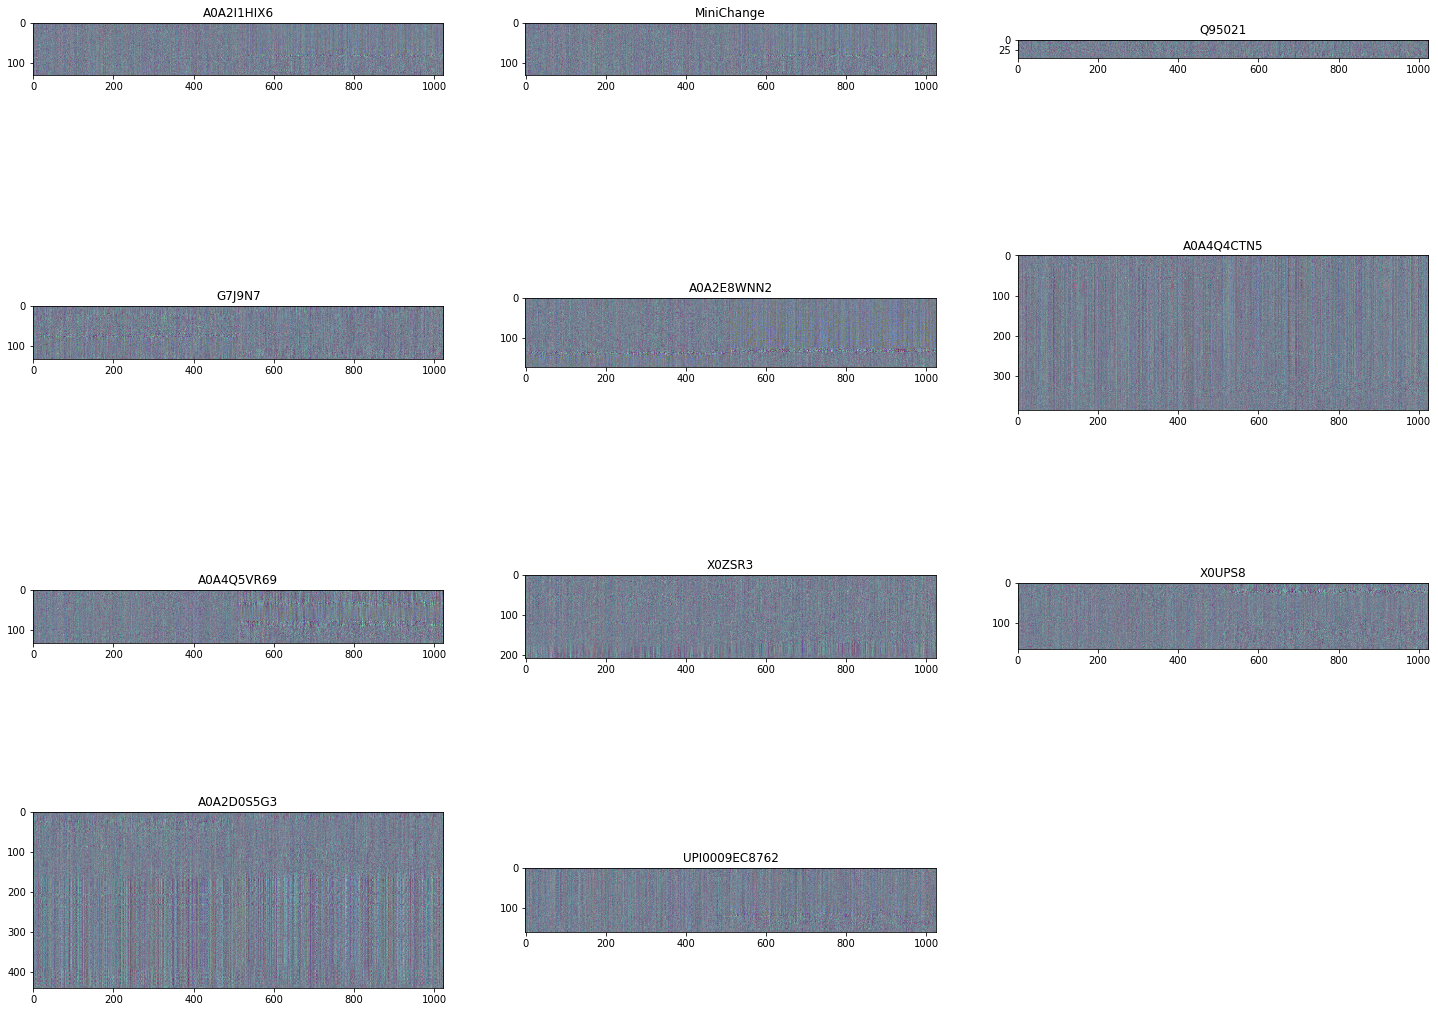

In [41]:
COLS = 3
ROWS = np.ceil(len(embeddings) / COLS)
IGNORE_FIRST = True

fig = plt.figure(figsize=(25,20))
for idx, emb in enumerate(embeddings):
    data = emb[1]
    data = np.rollaxis(data, 0, 3)  
    data = (data - min_vals) / dif
    if IGNORE_FIRST:
        data[:,:,0] = 0
    ax = fig.add_subplot(ROWS, COLS, idx+1)
    ax.set_title(emb[0])
    ax.imshow(data)
    
plt.show()